In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Load Data

In [4]:
train = pd.read_csv(r"C:\Users\91880\Downloads\Project-Housing_splitted\train.csv")
test = pd.read_csv(r"C:\Users\91880\Downloads\Project-Housing_splitted\test.csv")


train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# Exploratory Data Analysis (EDA)

In [7]:
!pip install termcolor

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=127bc67db09725fd05e0d9b7c0237b23f13d06a63c2acbcf20ed970ca6bc55e6
  Stored in directory: c:\users\91880\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [8]:
import termcolor
from termcolor import colored

In [9]:
# Let's check the shape of both datasets:

print(f"Shape of traning data= {colored(train.shape,'blue')}, test data:{colored(test.shape,'green')}")

Shape of traning data= (1168, 81), test data:(292, 80)


In [10]:
# checking for duplicates in the train data:

train.duplicated(subset='Id').sum()

0

In [11]:
# checking for duplicates in the test data:

test.duplicated(subset='Id').sum()

0

In [12]:
# Checking the info regardinfg type of variable and nulls values of all the variables:

info =  train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [13]:
# Let's describe the train data getting statistics os the variables:

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# checking for the number of unique values of each variable of the train data:

for col in train.columns:
    print("The number of values for", col + ":" + colored(str(len(train[col].unique())), 'blue'))

The number of values for Id:1168
The number of values for MSSubClass:15
The number of values for MSZoning:5
The number of values for LotFrontage:107
The number of values for LotArea:892
The number of values for Street:2
The number of values for Alley:3
The number of values for LotShape:4
The number of values for LandContour:4
The number of values for Utilities:1
The number of values for LotConfig:5
The number of values for LandSlope:3
The number of values for Neighborhood:25
The number of values for Condition1:9
The number of values for Condition2:8
The number of values for BldgType:5
The number of values for HouseStyle:8
The number of values for OverallQual:10
The number of values for OverallCond:9
The number of values for YearBuilt:110
The number of values for YearRemodAdd:61
The number of values for RoofStyle:6
The number of values for RoofMatl:8
The number of values for Exterior1st:14
The number of values for Exterior2nd:15
The number of values for MasVnrType:5
The number of values

In [15]:
# checking for the number of unique values of each variable of the test data:

for col in test.columns:
    print("The number of values for", col + "is :" + colored(str(len(test[col].unique())), 'green'))

The number of values for Idis :292
The number of values for MSSubClassis :15
The number of values for MSZoningis :4
The number of values for LotFrontageis :66
The number of values for LotAreais :249
The number of values for Streetis :2
The number of values for Alleyis :3
The number of values for LotShapeis :4
The number of values for LandContouris :4
The number of values for Utilitiesis :2
The number of values for LotConfigis :5
The number of values for LandSlopeis :3
The number of values for Neighborhoodis :24
The number of values for Condition1is :8
The number of values for Condition2is :2
The number of values for BldgTypeis :5
The number of values for HouseStyleis :8
The number of values for OverallQualis :8
The number of values for OverallCondis :7
The number of values for YearBuiltis :84
The number of values for YearRemodAddis :57
The number of values for RoofStyleis :5
The number of values for RoofMatlis :3
The number of values for Exterior1stis :12
The number of values for Exter

In [16]:
# Checking number of types of data in the train dataset:

train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [17]:
# Checking number of types of data in the test dataset:

test.dtypes.value_counts()

object     42
int64      34
float64     4
dtype: int64

After this inspection of the datasets, we see that there are a total of 1460 training examples and 1459 test examples.
In the train dataset there is a total number of attributes/features equals 81, which includes ID and SalePrice.
There is 80 attributes/features on the test data and it doesn't contain the variable 'SalePrice'. which is going to be 
the target variable.

In [18]:
# Save the identification column:

train_ID = train['Id']
test_ID = test['Id']

# Dropping it from the datasets:

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [19]:
# Concatenating both datasets:

concat = [train,test]

# Dropping the index of the DataFrame and replaces it with an index of increasing integers:

all_data = pd.concat(concat).reset_index(drop=True)  
                                                    
# Deleting SalePrice from all_data:

all_data.drop(['SalePrice'], axis=1, inplace=True)

In [20]:
# Checking the new dataframe:

all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
1,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal
2,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
3,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal
4,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
1456,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1457,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
1458,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [21]:
# Let's check the shape of the new dataframe:

print(f"Shape of traning data= {colored(all_data.shape,'blue')}")

Shape of traning data= (1460, 79)


# Missing Values

### Delete Unuseful Features:

In [22]:
# 'Utilities' feature contains almost all the values of one type of utility only. Since it wont be usefull 
# in modeling we can drop this feature:

all_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
# 'Street' feature also contains the unbalance data of type of road access to property. We can drop it:

all_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [24]:
# 'PoolQC' most of the data is missing for this feature, we can drop it:

all_data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [25]:
# Let's drop all these unuseful variables:

all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 76)


### Missing Values analysis:

<AxesSubplot:>

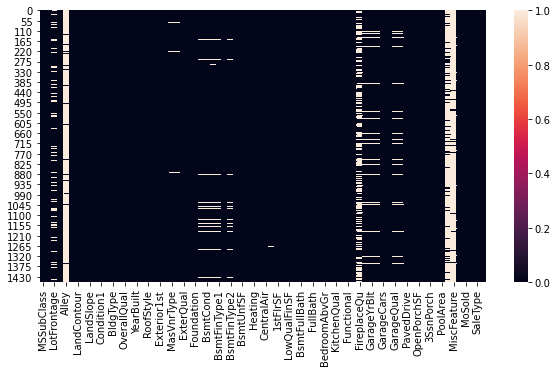

In [26]:
# visualizing missing values:

plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

Categorical variables:

In [27]:
# Checking the categorical variables that content Null values:

display('Categorical Columns that content Null values')
cate = all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)
cate[cate > 0]

'Categorical Columns that content Null values'

MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

In [28]:
# Let's check for the percentage of these categorical variables that content Null values:

categorical_miss_perct = round(100*(all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:10]
categorical_miss_perct

,Null values percentage
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
GarageCond,5.55
GarageQual,5.55
GarageFinish,5.55
GarageType,5.55
BsmtFinType2,2.60
BsmtExposure,2.60


In [29]:
# 'MiscFeature', 'Alley', 'Fence' for all of these featurs most of their 90% data is missing, so we can drop it:

all_data = all_data.drop(['MiscFeature', 'Alley', 'Fence',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 73)


In [30]:
# Fixing categorical variables:

# MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType,
# GarageType, GarageFinish, GarageQual, GarageCond, MSZoning, Functional, SaleType, Exterior2nd, Exterior1st, 
# KitchenQual    = replace with None:

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')
all_data['Functional'] = all_data['Functional'].fillna('None')
all_data['SaleType'] = all_data['SaleType'].fillna('None')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('None')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('None')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('None')

Numerical variables:

In [31]:
# Checking the numerical variables that content Null values:

display('Numerical Columns that content Null values')
num = all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)
num[num > 0]

'Numerical Columns that content Null values'

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [32]:
# Let's check for the percentage of these numerical variables that content Null values:

numerical_miss_perct = round(100*(all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:5]
numerical_miss_perct

# As we can see, the percentage of missing values in the numerical variebles doesn't even reach the 17% in those variables with the 
# highest amount of nulls. So I am not going to elimante any of them.

,Null values percentage
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
YrSold,0.00
BsmtFinSF2,0.00


In [33]:
# Fixing numerical variables:

# Groupping by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood:

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# MasVnrArea, GarageYrBlt, BsmtFullBath, BsmtHalfBath, TotalBsmtSF, GarageArea, BsmtFinSF2, BsmtFinSF1,
# BsmtUnfSF and GarageCars = replace with zero:

all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(int(0))
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(int(0))
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(int(0))
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(int(0))
all_data['GarageArea'] = all_data['GarageArea'].fillna(int(0))
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(int(0))
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(int(0))
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(int(0))
all_data['GarageCars'] = all_data['GarageCars'].fillna(int(0))

In [34]:
# Checking if there is any miss value:

sum(all_data.select_dtypes(include=object).isna().sum() != 0)

0

<AxesSubplot:>

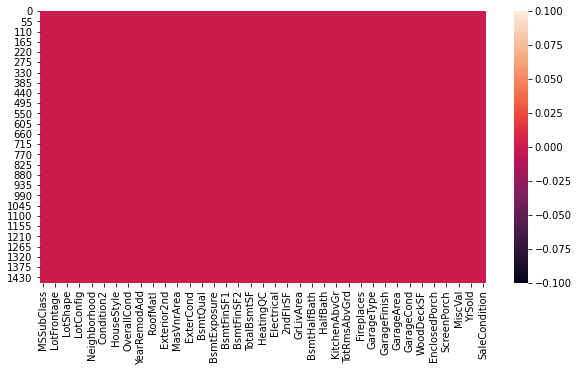

In [35]:
# Visualizing whether there is any null value or not after recoding:

plt.figure(figsize=(10, 5))
sns.heatmap(all_data.isna())

In [36]:
# Checking for any miss value without visualization:
all_data.loc[:, all_data.isna().any()]

""
0
1
2
3
4
...
1455
1456
1457
1458


# Analysis of the target variable


C:\Program1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


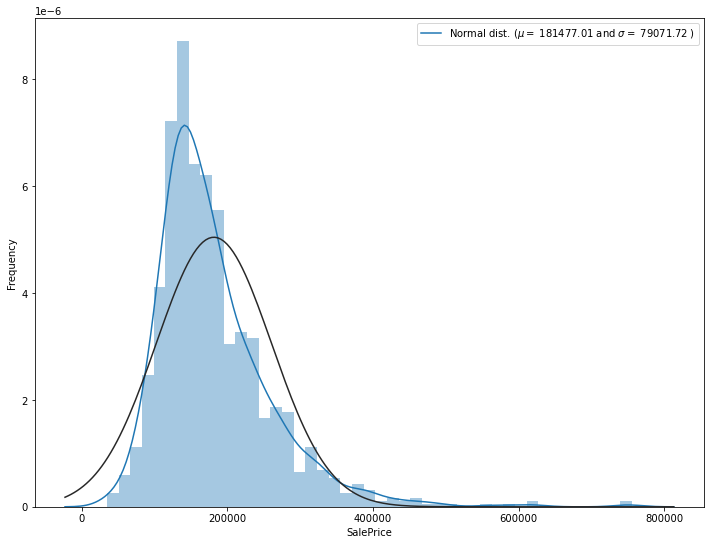

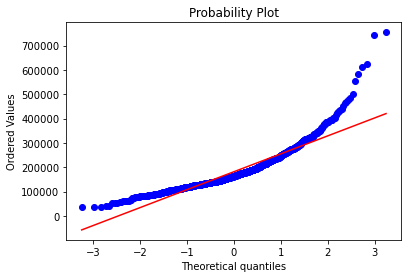

In [37]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [38]:
# analysis of the kurtosis and the skewness to check the normality of the variable:

kurt = train['SalePrice'].kurtosis()
skew = train['SalePrice'].skew()
print('Sale Price Kurtorsis {}'.format(kurt))
print('Sale Price Skewness {}'.format(skew))

Sale Price Kurtorsis 7.390656691648756
Sale Price Skewness 1.953877705368286


C:\Program1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


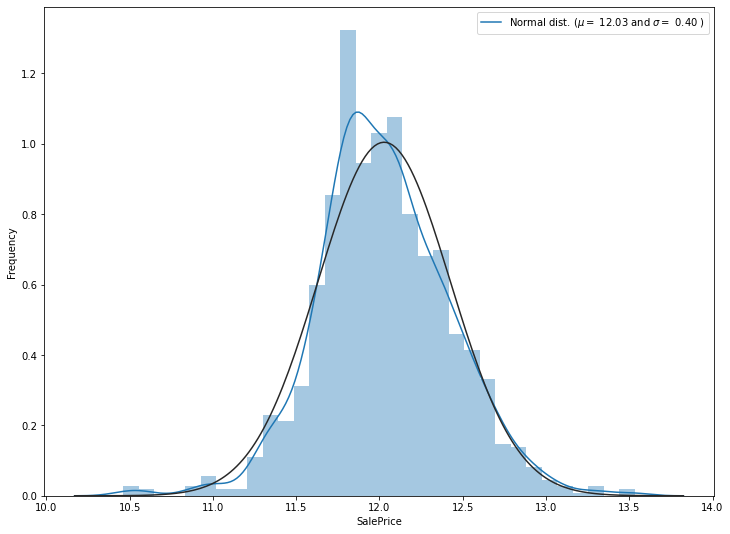

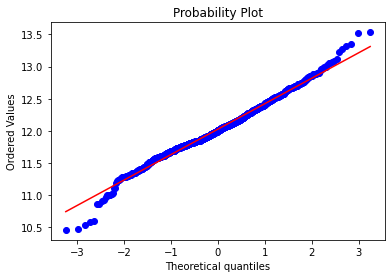

In [39]:
# Using log function for normalize the target variable:

train['SalePrice'] = np.log1p(train['SalePrice'])

# Checking to see the  normal distribution of the variable now:

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# robablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Correlation

In [40]:
# lets see the correlation between columns and target column:

corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,SalePrice
OverallQual,0.818551
GrLivArea,0.697365
GarageCars,0.671597
GarageArea,0.647207
FullBath,0.593204
TotalBsmtSF,0.592753
1stFlrSF,0.577723
YearBuilt,0.575768
YearRemodAdd,0.570256
TotRmsAbvGrd,0.531997


In [41]:
# Separating variable into new dataframe from original dataframe which has only numerical values
# There is 38 numerical attribute from 81 attributes:

train_corr = train.select_dtypes(include=[np.number])
train_corr.shape

(1168, 37)

<AxesSubplot:>

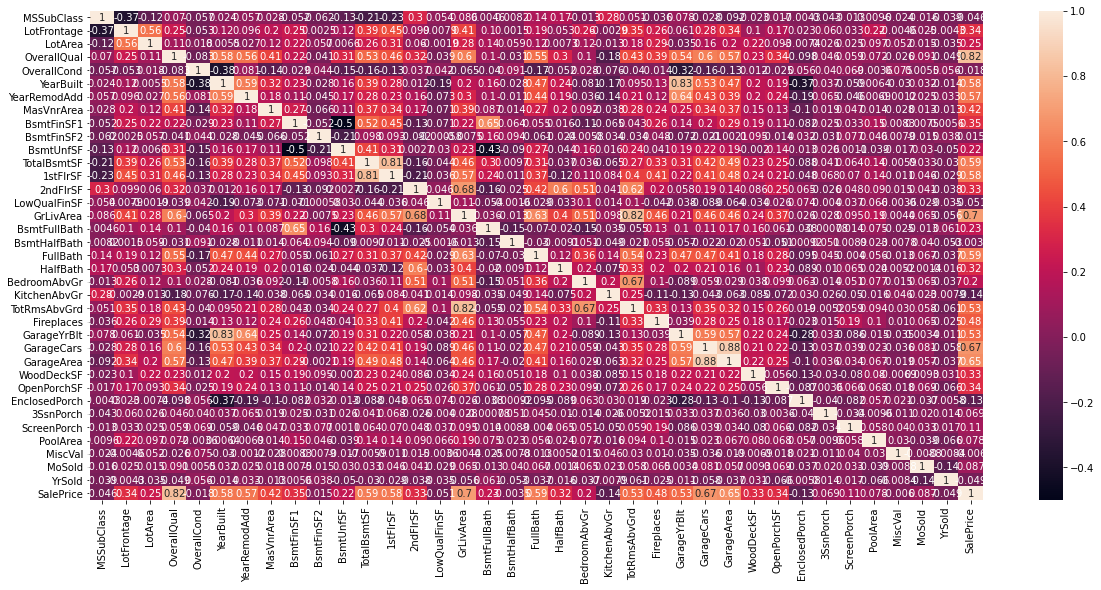

In [42]:
# Let's visualize a big Correlation plot:

corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

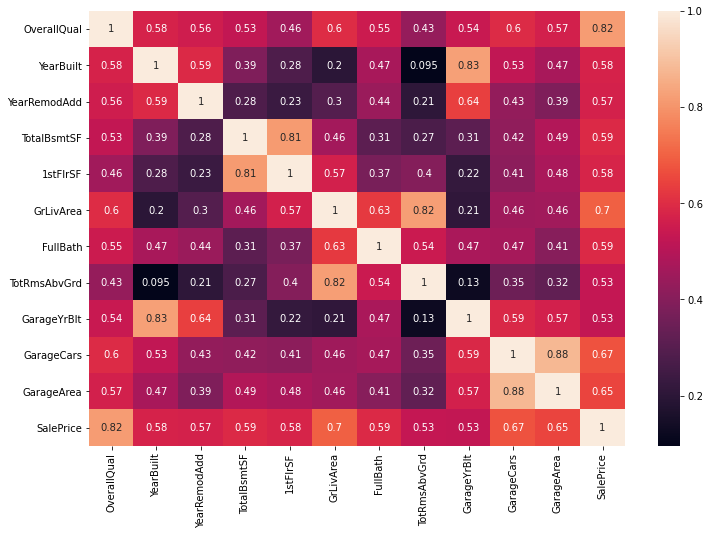

In [43]:
# Checking now for correlation higher than 0.5:

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Encoding 

In [44]:
# let's separeting the categorical variables into ordinals and nominals:

# Ordinals:

categorical_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
                     'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond','PavedDrive']

In [45]:
# Nominals:

categorical_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir',
                     'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st',
                     'Exterior2nd', 'Heating', 'Foundation']

In [46]:
# From sklearn importing LabelEncoder library to encode the ordinal variables:

from sklearn.preprocessing import LabelEncoder
for col in categorical_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [47]:
# Get k-1 dummies in nominal variables to avoid multicollinearity:

cat_feats_nominal_one_hot = pd.get_dummies(all_data[categorical_nominal], drop_first= True).reset_index(drop=True)

# checking it:

print(f'Shape of cat_feats_nominal_one_hot: {cat_feats_nominal_one_hot.shape}')
cat_feats_nominal_one_hot.head()

Shape of cat_feats_nominal_one_hot: (1460, 114)


,MSSubClass,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,120,2,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,20,10,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,60,6,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,20,1,2010,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,20,6,2009,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [48]:
# Now lets concatenate the one Hot Encoded categorcal nominal features with main data frame.

# First we need to drop the catgorical nominal columns from all_data:

all_data = all_data.drop(categorical_nominal, axis= 'columns')

# Now let;s to concat it:

all_data = pd.concat([all_data, cat_feats_nominal_one_hot], axis='columns')

# Checking shape now:

print(f'Shape of all_data: {all_data.shape}')

# Checking sfinal dataframe:

all_data.head()

Shape of all_data: (1460, 170)


,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,24.0,4928,0,3,4,0,4,6,5,1976,...,1,0,0,0,0,1,0,0,0,0
1,95.0,15865,0,3,4,1,0,8,6,1970,...,1,0,0,0,0,0,1,0,0,0
2,92.0,9920,0,3,1,0,0,7,5,1996,...,1,0,0,0,0,0,1,0,0,0
3,105.0,11751,0,3,4,0,0,6,6,1977,...,1,0,0,0,0,1,0,0,0,0
4,80.0,16635,0,3,2,0,0,6,7,1977,...,1,0,0,0,0,1,0,0,0,0


# MODELING

In [63]:
# Let's separate data:

train_data = pd.DataFrame(all_data[:1168])
test_data = pd.DataFrame(all_data[1168:])

test_data.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1168,86.0,14157,0,1,0,0,0,9,5,2005,...,1,0,0,0,0,0,1,0,0,0
1169,61.5,5814,0,3,1,0,4,8,5,1984,...,1,0,0,0,0,1,0,0,0,0
1170,70.0,11838,3,3,4,0,0,8,5,2001,...,1,0,0,0,0,0,1,0,0,0
1171,75.0,12000,3,0,4,0,0,7,7,1941,...,1,0,0,0,0,1,0,0,0,0
1172,86.0,14598,0,3,1,0,0,6,5,2007,...,1,0,0,0,0,0,1,0,0,0


In [64]:
# Taking values X and y:

X = train_data
y = train['SalePrice']

In [65]:
# Split data into train and test formate:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
# Checking:

print(f'Training set sizes: {X_train.shape}, {y_train.shape}')
print(f'Validation set sizes: {X_test.shape}, {y_test.shape}')

Training set sizes: (876, 170), (876,)
Validation set sizes: (292, 170), (292,)


## Linear Regression

In [67]:
# Training the model:

from sklearn import linear_model
model_lineal = linear_model.LinearRegression()

In [68]:
# Fitting the model:

model_lineal.fit(X_train, y_train)

LinearRegression()

In [69]:
# First evaluation of the LinearRegression model:

print("Accuracy --> ", round(model_lineal.score(X_test, y_test)*100),"%")

Accuracy -->  85 %


In [70]:
# Importing these libraries for calculating RMSE $ MAE:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE is: 
 0.024850936257774615


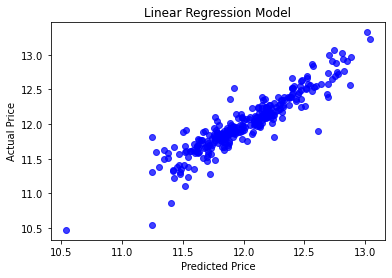

In [71]:
# Making predictions:

predictions_1 = model_lineal.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_1))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_1, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## RandomForestRegression

In [72]:
# Train the model:

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

In [73]:
# Fitting the model:

model2.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
# First evaluation of the RandomForestRegression model:

print("Accuracy  --> ", round(model2.score(X_test, y_test)*100),"%")

Accuracy  -->  86 %


RMSE is: 
 0.02458655384724936


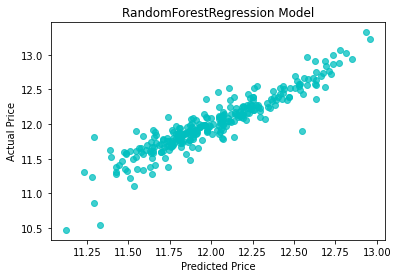

In [75]:
# Making predictions:

predictions_2 = model2.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_2))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_2, actual_values, alpha=.75,
            color='c')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForestRegression Model')
plt.show()

## BayesianRidge


In [76]:
# Train the model:

from sklearn.linear_model import BayesianRidge
baysian_ridge = BayesianRidge()#(compute_score=True,alpha_2=0.85)

# Fitting the model:

baysian_ridge.fit(X_train, y_train)

BayesianRidge()

In [77]:
# First evaluation of the BayesianRidge model:

print("Accuracy  --> ", round(baysian_ridge.score(X_test, y_test)*100),"%")

Accuracy  -->  87 %


RMSE is: 
 0.021778967409154405


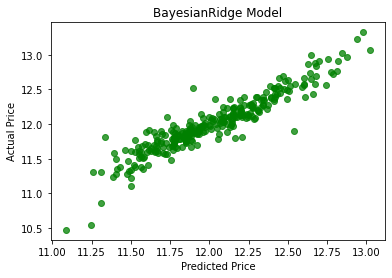

In [78]:
# Making predictions:

predictions_3 = baysian_ridge.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_3))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_3, actual_values, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('BayesianRidge Model')
plt.show()

## GradientBoostingRegressor

In [79]:
# Train the model:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Fitting the model:

gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [80]:
# First evaluation of the GradientBoostingRegressor model:

print("Accuracy --> ",round(gbr.score(X_test, y_test)*100),"%")

Accuracy -->  87 %


RMSE is: 
 0.022203434172533294


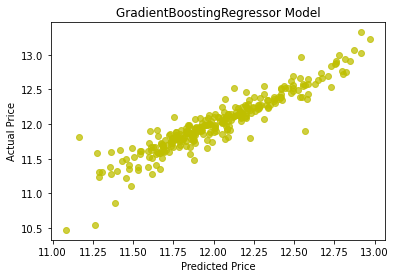

In [81]:
# Making predictions:

predictions_4 = gbr.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_4))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_4, actual_values, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GradientBoostingRegressor Model')
plt.show()

# EVALUATION MODELS

In [82]:
# Importing Libraries to carry out Cross Valitation:  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [83]:
# Creating a list with the four models:

All_models = ['Linear_Reg.','Random_Forest_Reg.','Bayesian_Ridge_Reg.','Grad_Boost_Reg.']

In [84]:
# Creation of the RMSE formula:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [85]:
# Cross Valitation formula:

def RMSE_CV(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [86]:
# Creating List for each measure:

RMSE_CV_scores = []
RMSE_scores = []
MAE_scores = []

In [87]:
# Calculating RMSE_CV for each one:

model_lineal_RMSE_CV = RMSE_CV(model_lineal, X_train, y_train)
RMSE_CV_scores.append(model_lineal_RMSE_CV)
RForest_model_RMSE_CV = RMSE_CV(model2, X_train, y_train)
RMSE_CV_scores.append(RForest_model_RMSE_CV)
baysian_ridge_model_RMSE_CV = RMSE_CV(baysian_ridge, X_train, y_train)
RMSE_CV_scores.append(baysian_ridge_model_RMSE_CV)
gbr_model_RMSE_CV = RMSE_CV(gbr, X_train, y_train)
RMSE_CV_scores.append(gbr_model_RMSE_CV)

# Calculating rmse for each one:

linear_model_rmse = rmse(y_test, predictions_1)
RMSE_scores.append(linear_model_rmse)
RForest_model_rmse = rmse(y_test, predictions_2)
RMSE_scores.append(RForest_model_rmse)
BayRidge_model_rmse = rmse(y_test, predictions_3)
RMSE_scores.append(BayRidge_model_rmse)
GBoosting_model_rmse = rmse(y_test, predictions_4)
RMSE_scores.append(GBoosting_model_rmse)

# Calculating mean_absolute_error for each one:

linear_model_mae = mean_absolute_error(predictions_1, y_test)
MAE_scores.append(linear_model_mae)
RForest_model_mae = mean_absolute_error(predictions_2, y_test)
MAE_scores.append(RForest_model_mae)
BayRidge_model_mae = mean_absolute_error(predictions_3, y_test)
MAE_scores.append(BayRidge_model_mae)
GBoosting_model_mae = mean_absolute_error(predictions_4, y_test)
MAE_scores.append(GBoosting_model_mae)

In [88]:
# Making all the results togheter for comparison:

final_evaluation_scores = pd.DataFrame(All_models, columns = ['Regressors'])
final_evaluation_scores['RMSE_CV_scores'] = RMSE_CV_scores
final_evaluation_scores['RMSE_scores'] = RMSE_scores
final_evaluation_scores['MAE_scores'] = MAE_scores
final_evaluation_scores

,Regressors,RMSE_CV_scores,RMSE_scores,MAE_scores
0,Linear_Reg.,0.173128,0.157642,0.110999
1,Random_Forest_Reg.,0.154012,0.156801,0.107193
2,Bayesian_Ridge_Reg.,0.157416,0.147577,0.101801
3,Grad_Boost_Reg.,0.137411,0.149008,0.098550


C:\Program1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


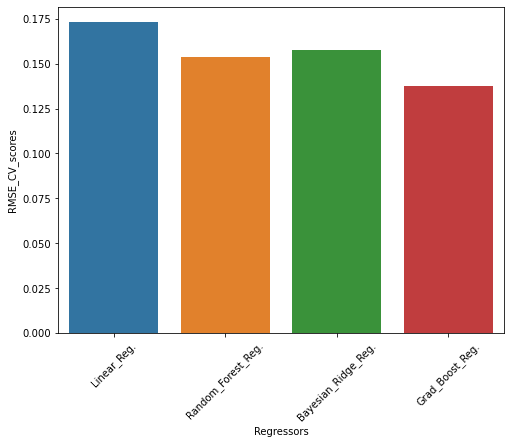

In [89]:
# Visualization RMSE_CV_scores:

plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_CV_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_CV_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

C:\Program1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


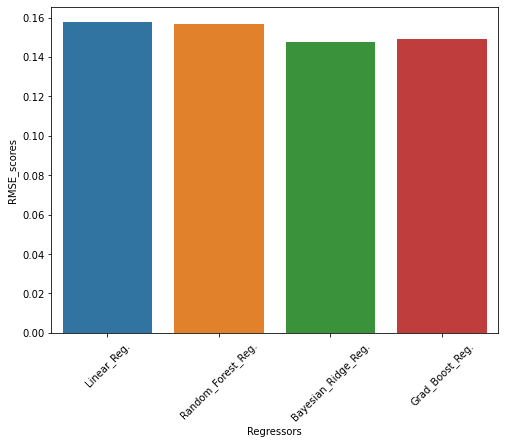

In [90]:
# Visualization RMSE_scores:


plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

C:\Program1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


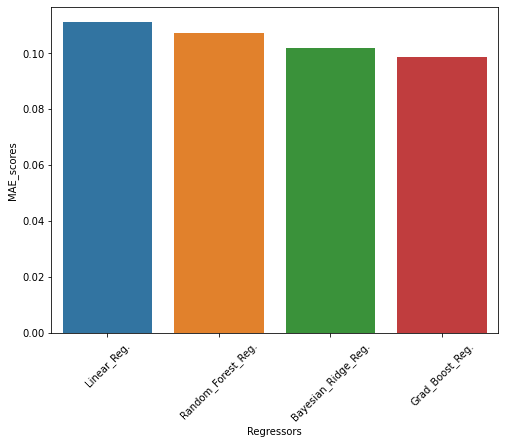

In [91]:
# Visualization MAE_scores:

plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['MAE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('MAE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

# FINAL STEP FOR SUBMISSION:


In [92]:
# Mean of all model's prediction:

# I am doing an ensemble model that weighs each of the four different models equally, then he average prediction at each data 
# point becomes the final prediction at this data point.

# I am using np.expm1 ( ) to calculate exp(x) - 1 for all elements in the array

In [93]:
Final_model = (np.expm1(model_lineal.predict(test_data)) + np.expm1(model2.predict(test_data)) + np.expm1(baysian_ridge.predict(test_data)) + np.expm1(gbr.predict(test_data)) ) / 4
Final_model

array([342817.63057235, 199480.06042906, 244753.26197386, 176846.64558924,
       214102.12800972,  81515.54647468, 132795.67933418, 311145.26351179,
       236815.0297947 , 161564.68863432,  81763.03660558, 135732.37765059,
       114888.97121385, 198346.52784705, 304065.21087243, 124106.75437134,
       113127.56432063, 119395.33870519, 179058.18487907, 205004.81610268,
       159235.68958716, 154577.52414557, 141645.08288332,  67848.5596587 ,
        97342.69461793, 129933.9929529 , 177788.55310509, 137269.1082613 ,
       165793.68065939,  80440.88723868, 141730.72978199, 189343.71695654,
       228891.2601384 , 167629.27324112, 114646.78822925, 178323.31700177,
       182668.84042752, 113138.59167674, 152268.20330936, 149375.15663827,
        91844.16065542, 318935.72841026, 194724.78513862, 188824.59402205,
       134809.82475505, 129983.54764412, 129554.37551559,  93537.31013716,
       216040.63213841, 299878.60878645, 126234.80573654, 203489.78733016,
        95486.45590992, 1

In [94]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Final_model
sub.to_csv('submission.csv',index=False)

In [95]:
result=  pd.read_csv('submission.csv')
result.head()

,Id,SalePrice
0,337,342817.630572
1,1018,199480.060429
2,929,244753.261974
3,1148,176846.645589
4,1227,214102.128010
